In [12]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import json
import pandas as pd

model = KeyedVectors.load_word2vec_format("/home/yamato/word2vec/GoogleNews-vectors-negative300.bin", binary=True)

s = []
t = []

for line in open('/home/yamato/word2vec/News_Category_Dataset_v2.json'):
    t.append(json.loads(line))
    
for l in t:
    if l['category'] not in s:
        s.append(l['category'])
category_to_id = {s[i]: i for i in range(len(s))}

{'CRIME': 0,
 'ENTERTAINMENT': 1,
 'WORLD NEWS': 2,
 'IMPACT': 3,
 'POLITICS': 4,
 'WEIRD NEWS': 5,
 'BLACK VOICES': 6,
 'WOMEN': 7,
 'COMEDY': 8,
 'QUEER VOICES': 9,
 'SPORTS': 10,
 'BUSINESS': 11,
 'TRAVEL': 12,
 'MEDIA': 13,
 'TECH': 14,
 'RELIGION': 15,
 'SCIENCE': 16,
 'LATINO VOICES': 17,
 'EDUCATION': 18,
 'COLLEGE': 19,
 'PARENTS': 20,
 'ARTS & CULTURE': 21,
 'STYLE': 22,
 'GREEN': 23,
 'TASTE': 24,
 'HEALTHY LIVING': 25,
 'THE WORLDPOST': 26,
 'GOOD NEWS': 27,
 'WORLDPOST': 28,
 'FIFTY': 29,
 'ARTS': 30,
 'WELLNESS': 31,
 'PARENTING': 32,
 'HOME & LIVING': 33,
 'STYLE & BEAUTY': 34,
 'DIVORCE': 35,
 'WEDDINGS': 36,
 'FOOD & DRINK': 37,
 'MONEY': 38,
 'ENVIRONMENT': 39,
 'CULTURE & ARTS': 40}

In [13]:
df = pd.read_json('/home/yamato/word2vec/News_Category_Dataset_v2.json', lines=True)
df.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [29]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
# using headlines and short_description as input X

df['text'] = df.headline

In [110]:
# tokenizing

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.text)
X = tokenizer.texts_to_sequences(df.text)
df['words'] = X

# delete some empty and short data

df['word_length'] = df.words.apply(lambda i: len(i))
df = df[df.word_length >= 5]

df.head()

,authors,category,date,headline,link,short_description,text,words,word_length,c2id
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,"[379, 359, 151, 1064, 2276, 5, 393, 248, 77, 8...",14,0
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,"[34, 1027, 1643, 19571, 7, 17721, 4218, 6, 1, ...",14,1
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,"[3719, 5732, 4528, 6, 1, 64, 71, 16, 468, 8362]",10,1
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,"[2071, 7845, 1843, 40098, 1534, 11909, 7, 303,...",11,1
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,"[30318, 25192, 826, 30, 14, 5526, 2960, 2, 850...",13,1


In [111]:
df.word_length.describe()

count    190255.000000
mean         10.028199
std           2.824546
min           5.000000
25%           8.000000
50%          10.000000
75%          12.000000
max          53.000000
Name: word_length, dtype: float64

In [113]:
from keras.preprocessing import sequence
maxlen = 50
X = list(sequence.pad_sequences(df.words, maxlen=maxlen))

In [36]:
df['c2id'] = df['category'].apply(lambda x: category_to_id[x])

/home/yamato/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
df.head()

,authors,category,date,headline,link,short_description,text,words,word_length,c2id
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,"[378, 360, 154, 1085, 2318, 5, 396, 240, 77, 8...",14,0
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,"[34, 1039, 1682, 19857, 7, 16617, 4176, 6, 1, ...",14,1
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,"[3779, 5820, 4600, 6, 1, 65, 71, 16, 463, 8506]",10,1
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,"[2061, 7974, 1867, 40763, 1568, 12108, 7, 308,...",11,1
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,"[30772, 25572, 833, 30, 14, 5432, 2986, 2, 859...",13,1


# Word Embedding

In [39]:
word_index = tokenizer.word_index

EMBEDDING_DIM = 300

In [38]:
embedding_index = dict({})
for idx, key in enumerate(model.wv.vocab):
    embedding_index[key] = model.wv[key]
    # Or my_dict[key] = model.wv.get_vector(key)
    # Or my_dict[key] = model.wv.word_vec(key, use_norm=False)

/home/yamato/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/home/yamato/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
print('Found %s unique tokens.' % len(word_index))
print('Total %s word vectors.' % len(embedding_index))

Found 75639 unique tokens.
Total 3000000 word vectors.


# Text CNN

In [114]:
import numpy as np
from keras import initializers, regularizers, constraints

from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, merge, Concatenate, Lambda, Average
from keras.models import Sequential, Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.initializers import Constant
from keras.layers.merge import add

embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(word_index)+1,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=maxlen,
                            trainable=False)

In [115]:
# prepared data 
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

X = np.array(X)
Y = np_utils.to_categorical(list(df.c2id))

# and split to training set ,validation set and test set

seed = 30
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=seed)

In [116]:
inp = Input(shape=(maxlen,), dtype='int32')
embedding = embedding_layer(inp)
stacks = []
for kernel_size in [2, 3, 4]:
    conv = Conv1D(64, kernel_size, padding='same', activation='relu', strides=1)(embedding)
    pool = MaxPooling1D(pool_size=3)(conv)
    drop = Dropout(0.5)(pool)
    stacks.append(drop)

merged = Concatenate()(stacks)
flatten = Flatten()(merged)
drop = Dropout(0.5)(flatten)
outp = Dense(len(category_to_id), activation='softmax')(drop)

TextCNN = Model(inputs=inp, outputs=outp)
TextCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

TextCNN.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 50, 300)      22692000    input_15[0][0]                   
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, 50, 64)       38464       embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 50, 64)       57664       embedding_6[0][0]                
____________________________________________________________________________________________

In [117]:
textcnn_history = TextCNN.fit(x_train, 
                              y_train, 
                              batch_size=128, 
                              epochs=20, 
                              validation_data=(x_val, y_val))

Epoch 1/20
1204/1204 [==============================] - 26s 21ms/step - loss: 3.0205 - accuracy: 0.2330 - val_loss: 2.7510 - val_accuracy: 0.2987
Epoch 2/20
1204/1204 [==============================] - 26s 22ms/step - loss: 2.7364 - accuracy: 0.3063 - val_loss: 2.5419 - val_accuracy: 0.3600
Epoch 3/20
1204/1204 [==============================] - 26s 22ms/step - loss: 2.5858 - accuracy: 0.3399 - val_loss: 2.4136 - val_accuracy: 0.3870
Epoch 4/20
1204/1204 [==============================] - 26s 22ms/step - loss: 2.4967 - accuracy: 0.3619 - val_loss: 2.3444 - val_accuracy: 0.4047
Epoch 5/20
1204/1204 [==============================] - 27s 22ms/step - loss: 2.4386 - accuracy: 0.3734 - val_loss: 2.2765 - val_accuracy: 0.4190
Epoch 6/20
1204/1204 [==============================] - 27s 22ms/step - loss: 2.3959 - accuracy: 0.3831 - val_loss: 2.2424 - val_accuracy: 0.4214
Epoch 7/20
1204/1204 [==============================] - 27s 23ms/step - loss: 2.3600 - accuracy: 0.3903 - val_loss: 2.2083 -

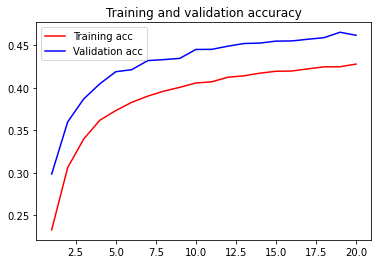

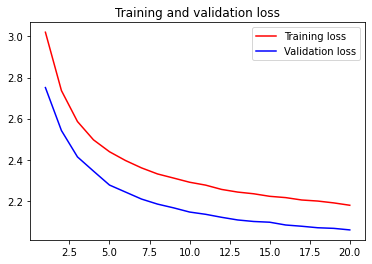

In [118]:
import matplotlib.pyplot as plt
acc = textcnn_history.history['accuracy']
val_acc = textcnn_history.history['val_accuracy']
loss = textcnn_history.history['loss']
val_loss = textcnn_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

In [124]:
acc = TextCNN.evaluate(x_test, y_test,batch_size=128)

149/149 [==============================] - 1s 4ms/step - loss: 2.0378 - accuracy: 0.4725


[2.0377938747406006, 0.47245875000953674]

# LSTM

In [125]:
# from https://www.kaggle.com/qqgeogor/keras-lstm-attention-glove840b-lb-0-043/code
from keras.engine.topology import Layer

inp = Input(shape=(maxlen,), dtype='int32')
embedding= embedding_layer(inp)
x = Bidirectional(LSTM(32))(embedding)
x = Dense(256, activation='relu')(x)
outp = Dense(len(category_to_id), activation='softmax')(x)

lstm = Model(inputs=inp, outputs=outp)
lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
lstm.summary()
 

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 50)]              0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 50, 300)           22692000  
_________________________________________________________________
bidirectional_8 (Bidirection (None, 64)                85248     
_________________________________________________________________
dense_22 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_23 (Dense)             (None, 41)                10537     
Total params: 22,804,425
Trainable params: 112,425
Non-trainable params: 22,692,000
_________________________________________________________________


In [126]:
lstm_history = lstm.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
1204/1204 [==============================] - 48s 40ms/step - loss: 2.9146 - acc: 0.2558 - val_loss: 2.6408 - val_acc: 0.3225
Epoch 2/20
1204/1204 [==============================] - 48s 40ms/step - loss: 2.4771 - acc: 0.3624 - val_loss: 2.3862 - val_acc: 0.3860
Epoch 3/20
1204/1204 [==============================] - 48s 40ms/step - loss: 2.2580 - acc: 0.4138 - val_loss: 2.2641 - val_acc: 0.4156
Epoch 4/20
1204/1204 [==============================] - 48s 40ms/step - loss: 2.1367 - acc: 0.4407 - val_loss: 2.1832 - val_acc: 0.4319
Epoch 5/20
1204/1204 [==============================] - 48s 40ms/step - loss: 2.0528 - acc: 0.4594 - val_loss: 2.1403 - val_acc: 0.4442
Epoch 6/20
1204/1204 [==============================] - 48s 40ms/step - loss: 1.9897 - acc: 0.4720 - val_loss: 2.0975 - val_acc: 0.4481
Epoch 7/20
1204/1204 [==============================] - 48s 40ms/step - loss: 1.9366 - acc: 0.4845 - val_loss: 2.0844 - val_acc: 0.4536
Epoch 8/20
1204/1204 [==========================

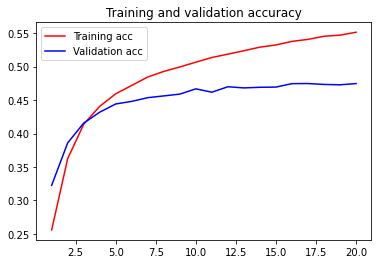

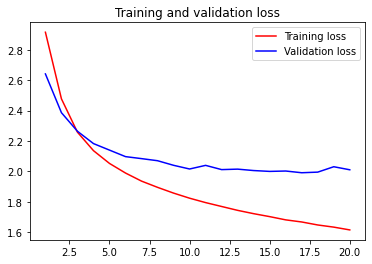

In [127]:
acc = lstm_history.history['acc']
val_acc = lstm_history.history['val_acc']
loss = lstm_history.history['loss']
val_loss = lstm_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

In [128]:
acc_lstm = lstm.evaluate(x_test, y_test,batch_size=128)

149/149 [==============================] - 2s 16ms/step - loss: 1.9873 - acc: 0.4827


In [131]:
def evaluate_accuracy(model):
    predicted = model.predict(x_test)
    diff = y_test.argmax(axis=-1) - predicted.argmax(axis=-1)
    corrects = np.where(diff == 0)[0].shape[0]
    total = y_test.shape[0]
    return float(corrects/total)

print("model TextCNN accuracy:          %.6f" % evaluate_accuracy(TextCNN))
print("model lstm:                      %.6f" % evaluate_accuracy(lstm))

model TextCNN accuracy:          0.472459
model lstm:                      0.482708
